In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [5]:
import numpy as np
m=1000
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 +np.random.randn(m,1)

In [6]:
X_poly = poly_features.fit_transform(X)

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.98679418]), array([[0.97659417, 0.50673705]]))

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=23)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.figure(figsize=(10,6))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
    plt.legend(loc='best')

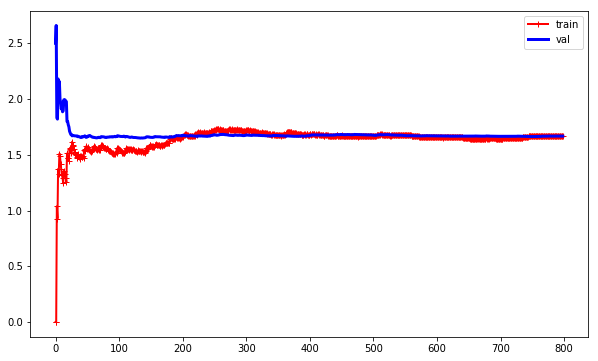

In [52]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [53]:
from sklearn.pipeline import Pipeline

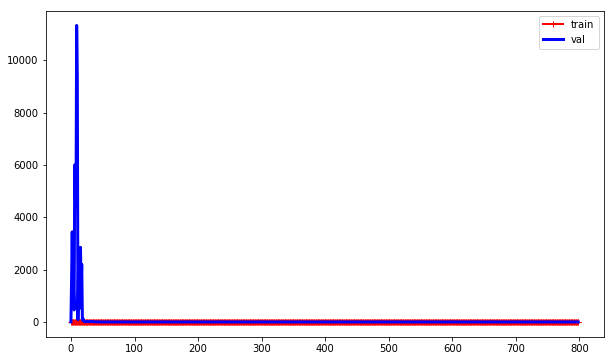

In [57]:
polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('sgd_reg',LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

In [63]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=1,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

from sklearn.preprocessing import StandardScaler
sl = StandardScaler()


X_train_poly,X_val_poly,y_train,y_val = train_test_split(X_poly,y,test_size=0.2,random_state=23)

X_train_poly_scaled = sl.fit_transform(X_train_poly)
X_val_poly_scaled = sl.transform(X_val_poly)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)       

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tcl

In [67]:
best_epoch

10

In [68]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=1, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=True)

In [71]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [72]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [73]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

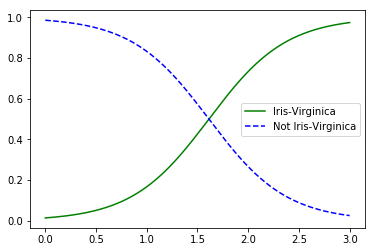

In [75]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.legend()
plt.show()